## 1.Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 200)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import os

In [3]:
# Importing train.csv
# Please make sure that the csv file is in the same folder as the python notebook otherwise this command wont work
df_train = pd.read_csv("c:/users/user/downloads/train.csv")

In [4]:
# Check the head of the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Inspect the various aspects of the df_train dataframe

In [5]:
df_train.shape

(1460, 81)

In [6]:
# Prining all the columns of the dataframe
df_train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [7]:
print("{} Numerical columns, {} Categorial columns are part of the original dataset.".format(
    list(df_train.select_dtypes(include=[np.number]).shape)[1],
    list(df_train.select_dtypes(include = ['object']).shape)[1]))

38 Numerical columns, 43 Categorial columns are part of the original dataset.


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
#Checking for any duplicates in the data frame
df_train.loc[df_train.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## 2: Cleaning the Data



### 2.1 Drop un-needed variables

#### Dropping Id column since its a unique identifier in the dataset and does not help in the analysis.

In [11]:
df_train = df_train.drop('Id',axis=1)

#### 2.2 Checking for Missing Values and Treating Them


In [12]:
# finding all the missing data and summing them based on each column and storing it in a dataframe
total = df_train.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by diving the number of missing values with total and  storing it in a dataframe
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above df's
df_train_missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Printing the data
df_train_missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


Text(0, 0.5, 'No of missing values')

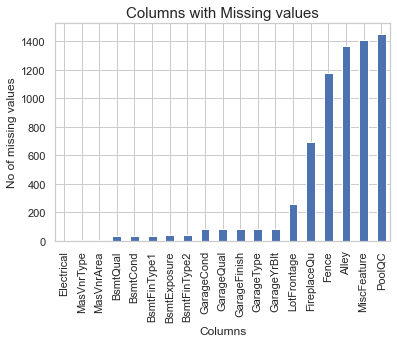

In [13]:
# setting a grid for the pot
sns.set_style("whitegrid")
# finding the no of missing values 
missing = df_train.isnull().sum()
# filtering the columns with just missing values
missing = missing[missing > 0]
# sorting the values
missing.sort_values(inplace=True)
# plotting the bar chart
missing.plot.bar()
# setting the title of the plot
plt.title('Columns with Missing values', fontsize=15)
# setting the x label
plt.xlabel('Columns')
# setting the y label
plt.ylabel('No of missing values')

Inference:
First thing to do is get rid of the features with more than 90% missing values. For example the PoolQC's missing values are probably due to the lack of pools in some buildings, which is very logical. But replacing those (more than 90%) missing values with "no pool" will leave us with a feature with low variance, and low variance features are uniformative for machine learning models. So we drop the features with more than 80% missing values.

In [14]:
# removing any column which has more than 90% null values
df_train = df_train.loc[:,df_train.isnull().sum()/df_train.shape[0]*100<80]
# printing the df
print(df_train.shape)

(1460, 76)


In [15]:
# finding all the missing data and summing them based on each column and storing it in a dataframe
total = df_train.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by diving the number of missing values with total and  storing it in a dataframe
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above df's
df_train_missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Printing the data
df_train_missing_data.head(16)

,Total,Percent
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247


In [16]:
NA=df_train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt','BsmtFinType2',
'BsmtFinType1','BsmtCond', 'BsmtQual','BsmtExposure', 'MasVnrArea','MasVnrType','Electrical','FireplaceQu',
             'LotFrontage']]

In [17]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print('We have :',NAcat.shape[1],'categorical features with missing values')
print('We have :',NAnum.shape[1],'numerical features with missing values')

We have : 12 categorical features with missing values
We have : 3 numerical features with missing values


#### Now, upon further checking the data, we can see that there are columns having null values but as per the data description these are not values which were not captured. These basically mean that those features were not available as part of the property. Hence we will have to impute them appropriately.

We have decided to impute such columns with a value of No.

In [18]:
# columns where NA values have meaning e.g. no garage etc.
cols_fillna = ['MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2']

# replace 'NA' with 'No' in these columns
for col in cols_fillna:
    df_train[col].fillna('No',inplace=True)

In [19]:
# finding all the missing data and summing them based on each column and storing it in a dataframe
total = df_train.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by diving the number of missing values with total and  storing it in a dataframe
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above df's
df_train_missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Printing the data
df_train_missing_data.head(5)

,Total,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000


#### Now that we have imputed the NA columns with the value of No, we are still left with columns which have a high percentage of null values.

Let's check these individually and see how to treat such columns.

#### 2.2.1 LotFrontage column check

In [20]:
# checking the count of different values within the column
df_train['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

<AxesSubplot:ylabel='Frequency'>

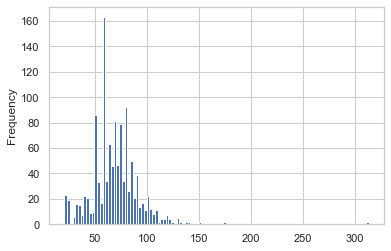

In [21]:
# pulling the length of number of unique values in the column
num_unique_values = len(df_train['LotFrontage'].unique())
# Plotting a histogram for visualizing the data
df_train['LotFrontage'].plot.hist(bins = num_unique_values)

#### Now we have decided to impute the values of either the mean/ median or mode with the null values. Hence lets check what these 3 metrics provide us.

In [22]:
# checking the mean of the column
print("Mean is ",df_train['LotFrontage'].mean())
# checking the mode of the column
print("Mode is ",df_train['LotFrontage'].mode())
# checking the median of the column
print("Median is ",df_train['LotFrontage'].median())

Mean is  70.04995836802665
Mode is  0    60.0
dtype: float64
Median is  69.0


Inference:
As all 3 metrics are comparable. But since we want missing value to be imputed with an integer, taking median i.e. 69.

In [23]:
# imputing the value of median to the null values
df_train.loc[pd.isnull(df_train['LotFrontage']),['LotFrontage']]=69

<AxesSubplot:ylabel='Frequency'>

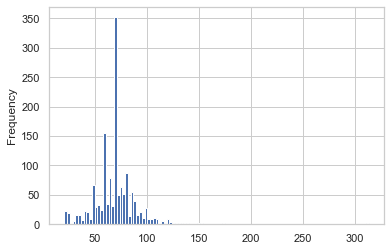

In [24]:
# pulling the length of number of unique values in the column
num_unique_values =  len(df_train['LotFrontage'].unique())
# Plotting a histogram for visualizing the data
df_train['LotFrontage'].plot.hist(bins = num_unique_values)

Inference:
Since the distribution has not changed much before and after the null value imputation, we should be good here



### 2.2.2 GarageYrBlt column check

In [25]:
# checking the count of different values within the column
df_train['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

<AxesSubplot:ylabel='Frequency'>

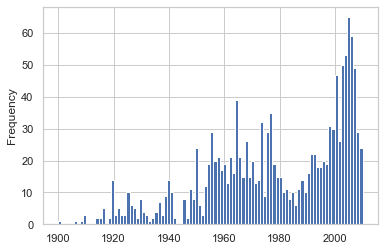

In [26]:
# pulling the length of number of unique values in the column
num_unique_values =  len(df_train['GarageYrBlt'].unique())
# Plotting a histogram for visualizing the data
df_train['GarageYrBlt'].plot.hist(bins = num_unique_values)

In [27]:
# checking the mean of the column
print("Mean is ",df_train['GarageYrBlt'].mean())
# checking the mode of the column
print("Mode is ",df_train['GarageYrBlt'].mode())
# checking the median of the column
print("Median is ",df_train['GarageYrBlt'].median())

Mean is  1978.5061638868744
Mode is  0    2005.0
dtype: float64
Median is  1980.0


Inference:
Since this column tells about in what year the garage was built, we cannot apply the mean or the median here. Hence we will impute the values with mode.

In [28]:
# imputing the value of mode to the null values
df_train.loc[pd.isnull(df_train['GarageYrBlt']),['GarageYrBlt']]=1980

<AxesSubplot:ylabel='Frequency'>

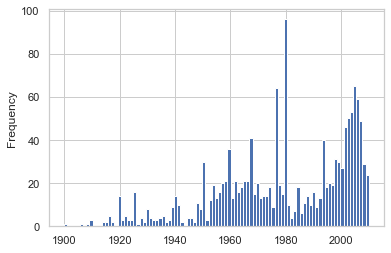

In [29]:
# pulling the length of number of unique values in the column
num_unique_values =  len(df_train['GarageYrBlt'].unique())
# Plotting a histogram for visualizing the data
df_train['GarageYrBlt'].plot.hist(bins = num_unique_values)

Inference:
Since the distribution has not changed much before and after the null value imputation, we should be good here

In [30]:
# finding all the missing data and summing them based on each column and storing it in a dataframe
total = df_train.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by diving the number of missing values with total and  storing it in a dataframe
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above df's
df_train_missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Printing the data
df_train_missing_data.head(5)

,Total,Percent
MasVnrArea,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000


### 2.2.3 MasVnrArea column check

In [31]:
# checking the count of different values within the column
df_train['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [32]:
# checking the mean of the column
print("Mean is ",df_train['MasVnrArea'].mean())
# checking the mode of the column
print("Mode is ",df_train['MasVnrArea'].mode())
# checking the median of the column
print("Median is ",df_train['MasVnrArea'].median())

Mean is  103.68526170798899
Mode is  0    0.0
dtype: float64
Median is  0.0


Inference:
Since the mode and median are the same, and majority of the values are 0, we will impute the missing values as 0

In [33]:
# imputing the value of median to the null values
df_train.loc[pd.isnull(df_train['MasVnrArea']),['MasVnrArea']]=0

#### 2.2.4 Electrical column check


In [34]:
# checking the count of different values within the column
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [35]:
df_train['Electrical'] = df_train['Electrical'].fillna("SBrkr")

In [36]:
# finding all the missing data and summing them based on each column and storing it in a dataframe
total = df_train.isnull().sum().sort_values(ascending = False)
# Finding the percentage of the missing data by diving the number of missing values with total and  storing it in a dataframe
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
# Concatinating both the above df's
df_train_missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# Printing the data
df_train_missing_data[df_train_missing_data.sum(axis=1)>0]

,Total,Percent


### 2.3 Outlier Analysis



There are 2 types of outliers and we will treat the outliers since they can skew our dataset.

Statistical
Domain specific
Lets plot a box plot to check the outliers

In [37]:
# before we move forward, lets create a copy of the existing df
df_train1=df_train.copy()

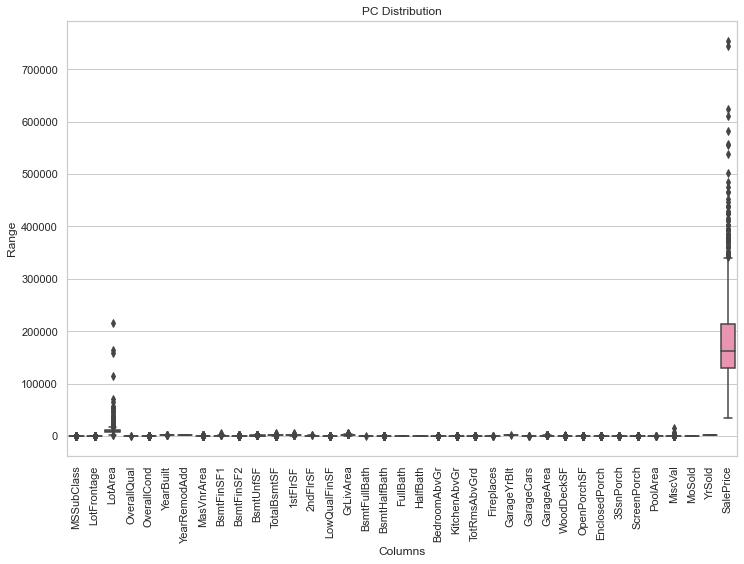

In [38]:
# Initializing the figure
fig = plt.figure(figsize = (12,8))
# prining the boxplot
# df_train = df_train.drop(['SalePrice'],axis=1)

sns.boxplot(data=df_train1)
# setting the title of the figure
plt.title("PC Distribution", fontsize = 12)
# setting the y-label
plt.ylabel("Range")
# setting the x-label
plt.xlabel("Columns")
plt.xticks(rotation=90)

# printing the plot
plt.show()

In [39]:
df_train1.describe(percentiles=[.05,.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,20.000000,35.950000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,183

As we can see from the graph and table above, there are some outliers in the dataset. Lets treat these outliers. We will keep the lower quantile at 0.05 and higher quantile at 0.95.

In [40]:
# Finding the columns on which the outlier treatment will be performed
AllCols = df_train1.select_dtypes(exclude='object')
# Sorting the columns
AllCols = AllCols[sorted(AllCols.columns)]
# printing the columns
print(AllCols.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')


In [41]:
# running a for loop to remove the outliers from each column
for i in AllCols.columns:
    # setting the lower whisker
    Q1 = df_train[i].quantile(0.05)
    # setting the upper whisker
    Q3 = df_train[i].quantile(0.95)
    # setting the IQR by dividing the upper with lower quantile
    IQR = Q3 - Q1
    # performing the outlier analysis
    df_train = df_train[(df_train[i] >= Q1-1.5*IQR) & (df_train[i] <= Q3+1.5*IQR)]


In [42]:
# Checking the shape of the df now
df_train.shape

(1266, 76)

In [43]:
# checking the different percentiles now
df_train.describe(percentiles=[.05,.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.0,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.0,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.0,1266.000000,1266.0,1266.0,1266.000000,1266.000000,1266.000000
mean,54.522117,69.081359,9640.176935,6.155608,5.567930,1973.480253,1985.822275,103.954186,441.757504,40.281201,574.886256,1056.924961,1143.785150,336.422591,0.0,1480.207741,0.420221,0.053712,1.541074,0.393365,2.815956,1.0,6.392575,0.615324,1979.434439,1.783570,475.955766,93.585308,45.843602,21.109795,0.0,14.796998,0.0,0.0,6.293049,2007.804107,181610.662717
std,40.663333,19.976837,4133.746732,1.364816,1.082618,29.436365,20.624538,173.174685,428.430328,137.986440,439.848270,397.931851,367.996322,424.218030,0.0,481.124117,0.500152,0.229017,0.538160,0.496712,0.739681,0.0,1.508314,0.629739,24.106468,0.730314,208.283388,120.249869,60.675897,59.192870,0.0,53.234175,0.0,0.0,2.694788,1.322179,75827.202320
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,2006.000000,35311.000000
5%,20.000000,35.000000,3182.000000,4.000000,4.000000,1920.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,546.000000,672.000000,0.000000,0.0,845.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,4.000000,0.000000,1930.250000,1.000000,180.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.000000,2006.000000,89478.250000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,242.500000,799.250000,864.250000,0.000000,0.0,1114.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1963.000000,1.000000,331.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,2007.000000,131000.000000
50%,50.000000,69.000000,9356.500000,6.000000,5.000000,1976.000000,1995.000000,0.000000,387.500000,0.000000,483.500000,990.000000,1072.000000,0.000000,0.0,1440.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,27.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2008.000000,165000.000000
75%,60.000000,78.750000,11433.250000,7.000000,6.000000,2002.000000,2004.000000,168.750000,719.000000,0.000000,808.000000,1276.750000,1362.000000,720.000000,0.0,1737.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,2009.000000,215000.000000
90%,120.000000,91.500000,14003.000000,8.000000,7.000000,2006.000000,2007.000000,328.000000,1056.000000,93.000000,1238.500000,1580.000000,1656.000000,911.000000,0.0,2103.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.0,8.000000,1.000000,2006.000000,3.000000,756.500000,253.000000,128.000000,112.000000,0.0,0.000000,0.0,0.0,10.000000,2010.000000,280000.000000
95%,160.000000,102.750000,16186.500000,8.000000,8.000000,2007.000000,2007.750000,450.750000,1255.750000,374.000000,1468.000000,1740.000000,1809.000000,1119.750000,0.0,2396.500000,1.000000,1.000000,2.000000,1.000000,4.000000,1.0,9.000000,2.000000,2007.000000,3.000000,851.500000,321.500000,169.000000,176.000000,0.0,160.000000,0.0,0.0,11.000000,2010.000000,325906.000000


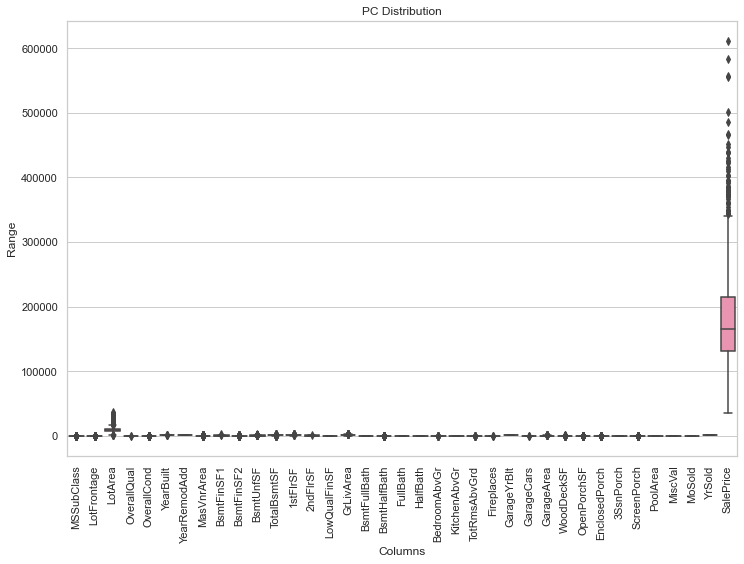

In [44]:
# Initializing the figure
fig = plt.figure(figsize = (12,8))
# prining the boxplot
# df_train1 = df_train.drop(['SalePrice','LotArea'],axis=1)

sns.boxplot(data=df_train)
# setting the title of the figure
plt.title("PC Distribution", fontsize = 12)
# setting the y-label
plt.ylabel("Range")
# setting the x-label
plt.xlabel("Columns")
plt.xticks(rotation=90)

# printing the plot
plt.show()

In [45]:
# Let's look at the scarifice
print("Shape before outlier treatment: ",df_train1.shape)
print("Shape after outlier treatment: ",df_train.shape)

print("Percentage data removal is around {}%".format(round(100*(df_train1.shape[0]-df_train.shape[0])/df_train1.shape[0]),2))

Shape before outlier treatment:  (1460, 76)
Shape after outlier treatment:  (1266, 76)
Percentage data removal is around 13%


## 3: Visualising the Data using EDA
Here's where we'll identify if some predictors directly have a strong association with the outcome variable i.e Sales Price.

We'll visualise our data using matplotlib and seaborn.

3.1 Univariate Analysis


3.1.1 Plotting the Price of all the houses in the dataset

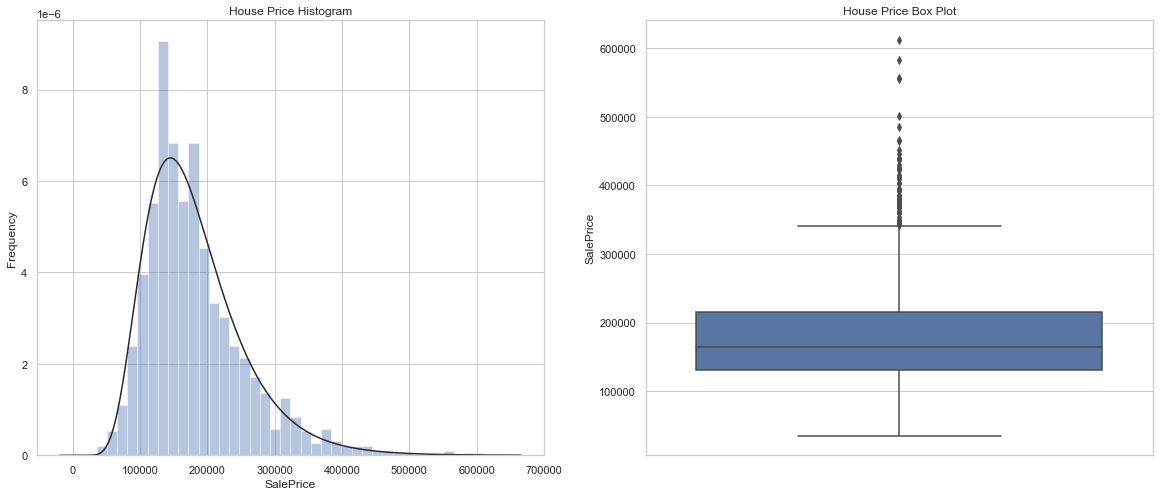

In [46]:
# Initializing a figure
plt.figure(figsize=(20,8))

# Initializing a subplot
plt.subplot(1,2,1)
# setting the title of the plot
plt.title('House Price Histogram')
# Plotting a Histogram for price column
sns.distplot(df_train.SalePrice, kde=False, fit=stats.lognorm)
plt.ylabel('Frequency')

# Initializing another subplot
plt.subplot(1,2,2)
# setting the title of the plot
plt.title('House Price Box Plot')
# Plotting a boxplot for price column
sns.boxplot(y=df_train.SalePrice)

plt.show()

In [47]:
# Checking the various percentile values for the price column
print(df_train.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      1266.000000
mean     181610.662717
std       75827.202320
min       35311.000000
25%      131000.000000
50%      165000.000000
75%      215000.000000
85%      252169.500000
90%      280000.000000
100%     611657.000000
max      611657.000000
Name: SalePrice, dtype: float64


In [48]:
#skewness
print("Skewness: " + str(df_train['SalePrice'].skew()))

Skewness: 1.4605471816764524


Inference :

The house price's looks to be right-skewed as majority of the house prices are low (Below 250,000).

There is a significant difference between the mean and the median of the price distribution.
Large Standard deviation indicates high variance in the house prices (85% of the prices are below 250,000, whereas the remaining 15% are between 250,000 and 755,000).


Note: There are some outliers in the Price as well but we will not remove them for now. Also the target variable is highly skewed. We will treat this later on.

#### 3.1.2 Visualising Numeric Variables
For Visualization, we will 1st find all the numerical columns and then make scatterplots for all of them.

In [49]:
# Finding all the numerical columns in the dataset. 
numCols = df_train.select_dtypes(include=['int64','float'])

# Sorting the columns
numCols = numCols[sorted(numCols.columns)]

# Printing the columns
print(numCols.columns)
print("Numerical features : " + str(len(numCols.columns)))

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')
Numerical features : 37


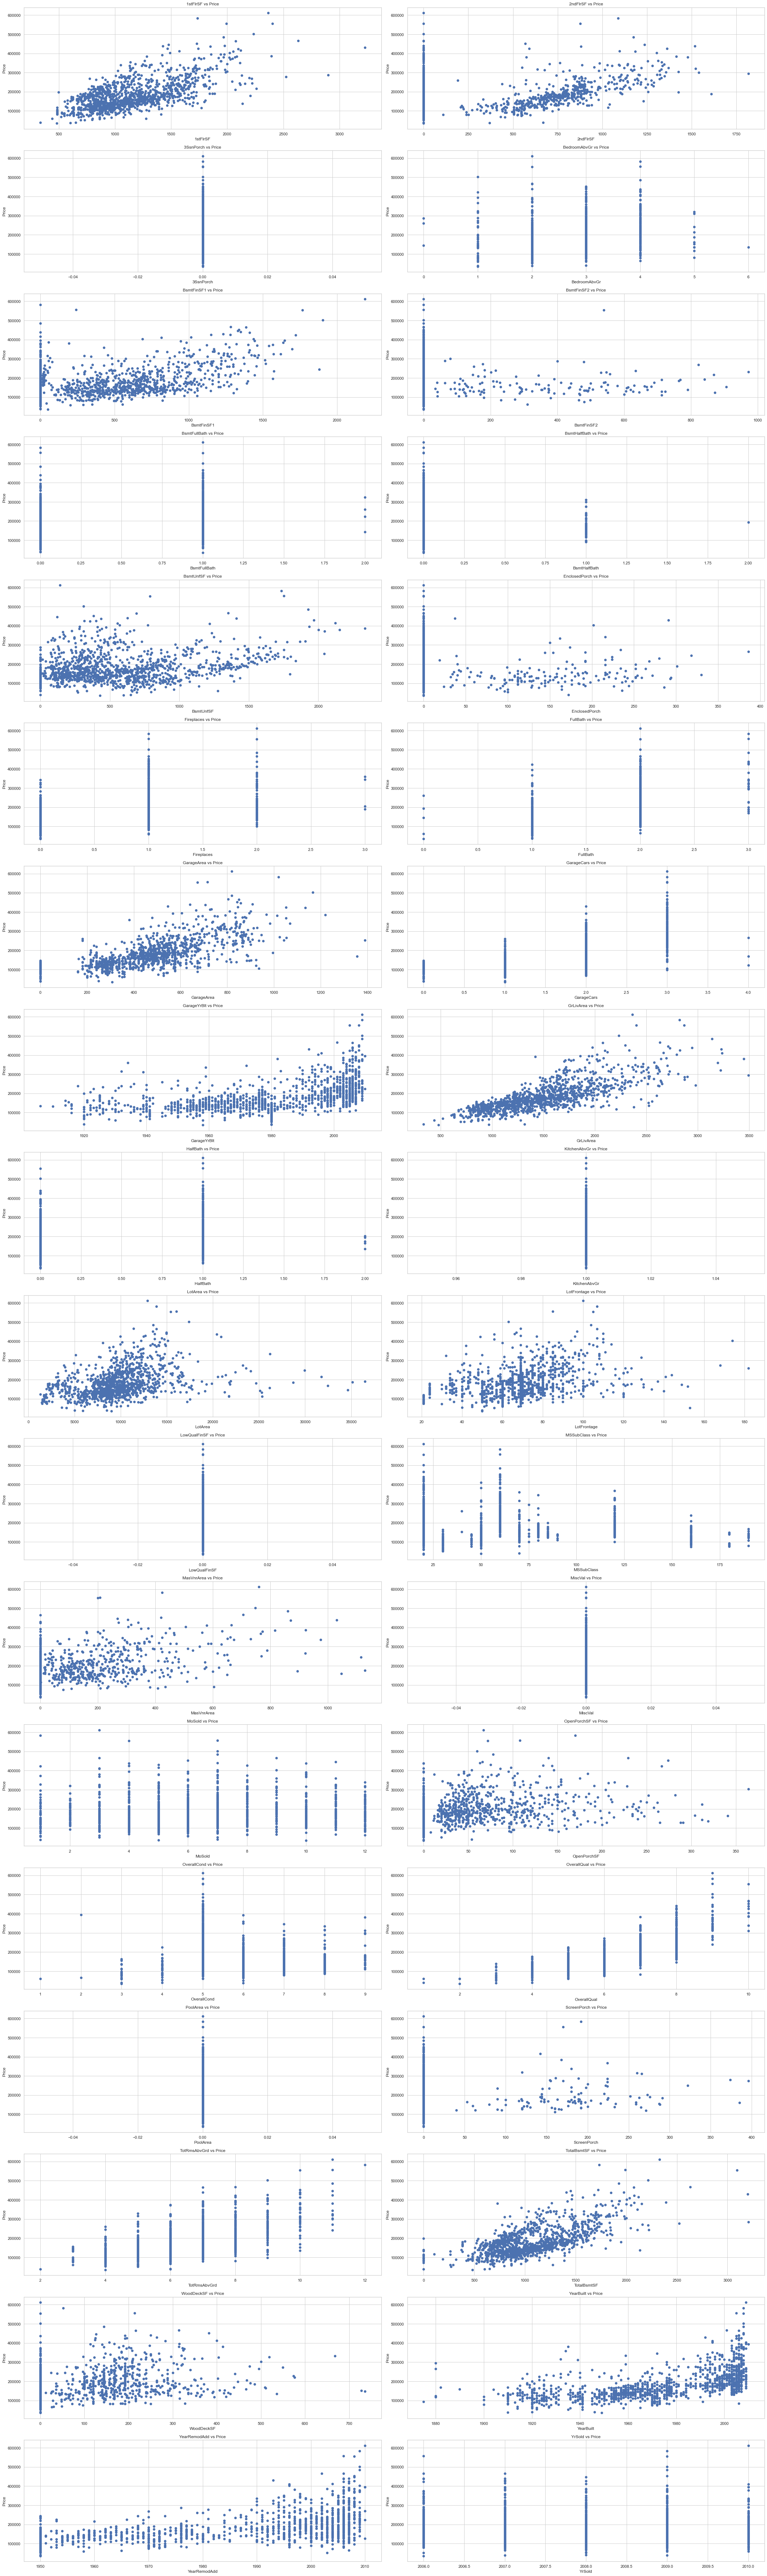

In [50]:
# Initializing a figure
plt.figure(figsize=(30,200))

# Dropping the price column from the plot since we dont need to plot a scatter plot for price
numCols = numCols.drop('SalePrice',axis=1)

# running a for-loop to print the scatter plots for all numerical columns
for i in range(len(numCols.columns)):
    # Creating a sub plot
    plt.subplot(len(numCols.columns),2,i+1)
    # Creating a scatter plot
    plt.scatter(df_train[numCols.columns[i]],df_train['SalePrice'])
    # Assigning a title to the plot
    plt.title(numCols.columns[i]+' vs Price')
    # Setting the y label
    plt.ylabel('Price')
    # setting the x label
    plt.xlabel(numCols.columns[i])


# printing all the plots
plt.tight_layout()

Inference:


1stFlrSF, 2ndFlrSF, GarageArea, GrLivArea, GarageYrBlt,LotFrontage, LotArea,OverallQual,TotalBsmtSF,WoodDeckSF seem to be positively correlated to price

Majority of the values in 3SsnPorch, LowQualFinSF, MiscVal, PoolArea,ScreenPorch are 0 hence we can take a call to delete these columns if the columns are heavily skewed.

BedroomAbvGr,MoSold seems to have less correlation with price.

BsmtFinSF1, BsmtFinSF2,BsmtFullBath, BsmtHalfBath, BsmtUnfSF,Enclosed Porch, HalfBath, Fireplaces, FullBath, GarageCars, MSSubClass, MasVnrArea, OpenPorchSF,OverallCond,TotRmsAbvGrd, YearBuilt, YearRemodAdd,YrSold seems to have some correlation with price.

Majority of the values in kitchenAbvGr are 1 hence we can take a call to delete this columns if the column is heavily skewed.
#### 3.1.3 Visualising Categorical Variables
In order to visualize the Categorical Variables, we will make Histograms and Boxplots.

In [51]:
# Finding the categorical columns and printing the same.
categCols = df_train.select_dtypes(exclude=['int64','float64'])
# Sorting the columns
categCols = categCols[sorted(categCols.columns)]
# printing the columns
print(categCols.columns)

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning',
       'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities'],
      dtype='object')


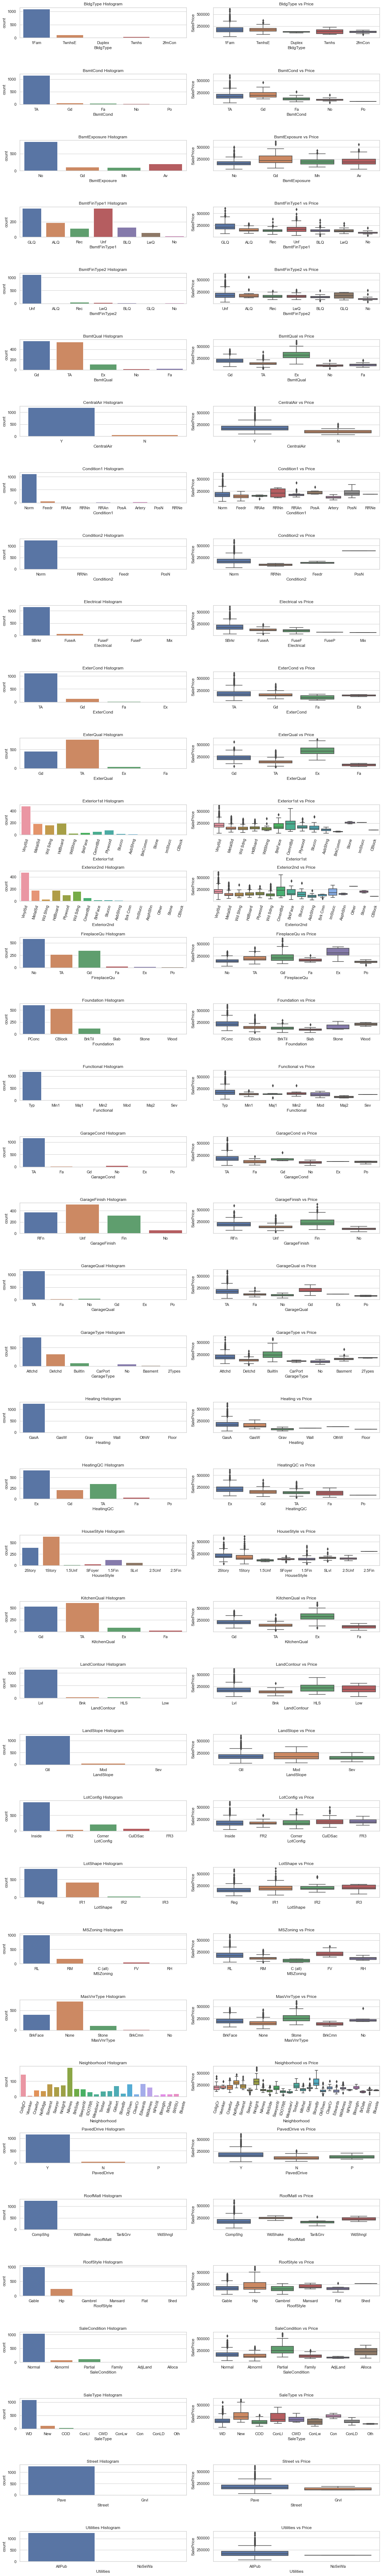

In [52]:
# Initializing a figure
plt.figure(figsize=(15,100))

# Initializing a variable for plotting multiple sub plots
n=0

# running a for-loop to print the histogram and boxplots for all categorical columns
for i in range(len(categCols.columns)):
    # Increasing the count of the variable n
    n+=1
    # Creating a 1st sub plot
    plt.subplot(len(categCols.columns),2,n)
    # Creating a Histogram as the 1st plot for the column
    sns.countplot(df_train[categCols.columns[i]])
    # assigning x label rotation for carName column for proper visibility
    if categCols.columns[i]=='Exterior1st' or categCols.columns[i]=='Exterior2nd' or categCols.columns[i]=='Neighborhood':        plt.xticks(rotation=75)
    else:
        plt.xticks(rotation=0)
    # Assigning a title to the plot
    plt.title(categCols.columns[i]+' Histogram')
    
    # Increasing the count of the variable n to plot the box plot for the same column
    n+=1
    
    # Creating a 2nd sub plot
    plt.subplot(len(categCols.columns),2,n)
    # Creating a Boxplot as the 2nd plot for the column
    sns.boxplot(x=df_train[categCols.columns[i]], y=df_train1.SalePrice)
    # Assigning a title to the plot
    plt.title(categCols.columns[i]+' vs Price')
    # assigning x label rotation for carName column for proper visibility
    if categCols.columns[i]=='Exterior1st' or categCols.columns[i]=='Exterior2nd' or categCols.columns[i]=='Neighborhood':
        plt.xticks(rotation=75)
    else:
        plt.xticks(rotation=0)
        

# printing all the plots
plt.tight_layout()

Conclusion:
Based on the EDA, we can easily drop some columns which are highly skewed since they will not help us in our model building.

In [53]:
# pulling all the columns which can be deleted based on skewness
cols_to_drop = ['Utilities','3SsnPorch','LowQualFinSF','MiscVal','PoolArea','ScreenPorch','KitchenAbvGr','GarageQual'
               ,'GarageCond','Functional','Heating','LandContour','LandSlope','LotConfig','MSZoning','PavedDrive',
                'RoofMatl','RoofStyle','SaleCondition','SaleType','Street']

# running the for loop to print the value counts
for i in cols_to_drop:
    print(df_train[i].value_counts(normalize=True) * 100)

AllPub    99.921011
NoSeWa     0.078989
Name: Utilities, dtype: float64
0    100.0
Name: 3SsnPorch, dtype: float64
0    100.0
Name: LowQualFinSF, dtype: float64
0    100.0
Name: MiscVal, dtype: float64
0    100.0
Name: PoolArea, dtype: float64
0      91.864139
192     0.473934
224     0.394945
189     0.315956
180     0.315956
         ...    
197     0.078989
190     0.078989
185     0.078989
182     0.078989
178     0.078989
Name: ScreenPorch, Length: 68, dtype: float64
1    100.0
Name: KitchenAbvGr, dtype: float64
TA    91.785150
No     4.344392
Fa     2.922591
Gd     0.710900
Po     0.157978
Ex     0.078989
Name: GarageQual, dtype: float64
TA    92.417062
No     4.344392
Fa     2.211690
Gd     0.552923
Po     0.394945
Ex     0.078989
Name: GarageCond, dtype: float64
Typ     94.154818
Min2     2.211690
Min1     1.816746
Maj1     0.868878
Mod      0.552923
Maj2     0.315956
Sev      0.078989
Name: Functional, dtype: float64
GasA     98.104265
GasW      1.105845
Grav      0.552923
Oth

Looking at the distribution of the values in the above mentioned columns, we have taken a decision of deleting all these columns which have a single value of >80% since they will not help us in our model building

In [54]:
# dropping the columns 
df_train = df_train.drop(['Utilities','3SsnPorch','LowQualFinSF','MiscVal','PoolArea','ScreenPorch','KitchenAbvGr','GarageQual'
               ,'GarageCond','Functional','Heating','LandContour','MSZoning','PavedDrive',
                'RoofStyle','SaleCondition','SaleType','Street','BedroomAbvGr','MoSold'],axis=1)

In [55]:
# checking the shape of the df now
df_train.shape

(1266, 56)

Let's check the correlation coefficients to see which variables are highly correlated.

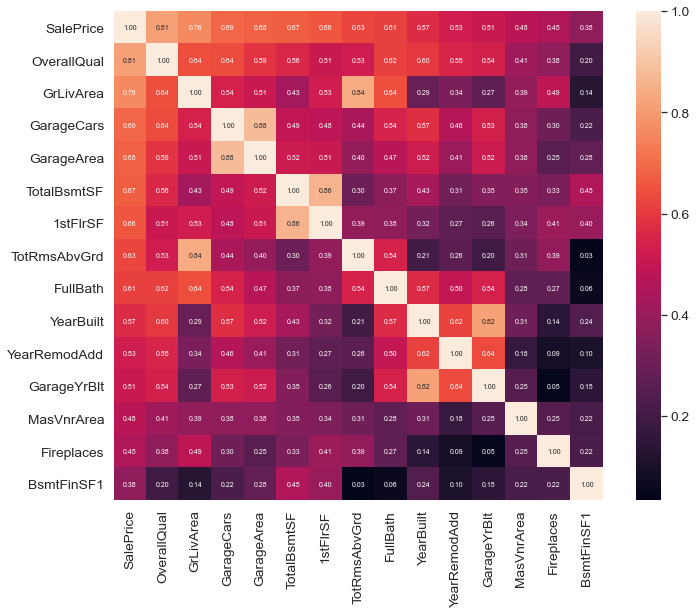

In [56]:
# saleprice correlation matrix
corr_num = 15 #number of variables for heatmap
corrmat = df_train.corr()
cols_corr = corrmat.nlargest(corr_num, 'SalePrice')['SalePrice'].index
corr_mat_sales = np.corrcoef(df_train[cols_corr].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(corr_mat_sales, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols_corr.values, xticklabels=cols_corr.values)
plt.show()

Inference:
We can see that OverAllQual, GrLivArea and GarageCars are highly correlated with Sales Price.


## 4: Data Preparation
Ok, now that we have dealt with all the missing values and the uncorrelated columns, it looks like it's time for some feature engineering, the second part of our data preprocessing. We need to create feature vectors in order to get the data ready to be fed into our model as training data. This requires us to convert the categorical values into representative numbers.

### 4.1 Check for skewness
First, let's take a look at our target

Text(0, 0.5, 'Frequency')

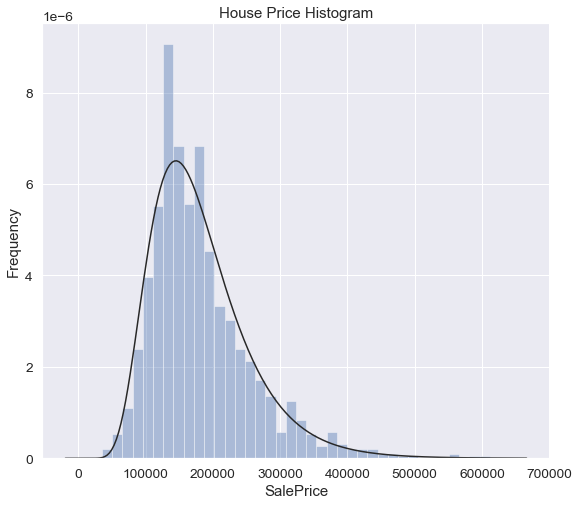

In [57]:
# Initializing a figure
plt.figure(figsize=(20,8))

# Initializing a subplot
plt.subplot(1,2,1)
# setting the title of the plot
plt.title('House Price Histogram')
# Plotting a Histogram for price column
sns.distplot(df_train.SalePrice, kde=False, fit=stats.lognorm)
plt.ylabel('Frequency')

Since the data is skewed, we will try to fix this with a log transformation.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

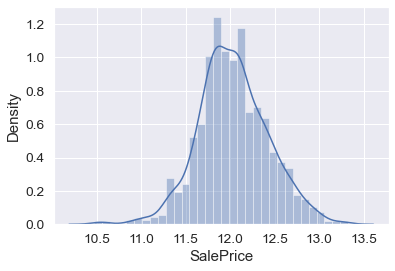

In [58]:
# Checking if the log transformation normalizes the target variable
sns.distplot(np.log(df_train["SalePrice"]))

Inference:
It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can boost model performance.

In [59]:
# Applying the log transformation to the target variable
df_train["SalePrice"] = np.log(df_train["SalePrice"])

In [60]:
# importing the skew library to check the skewness
from scipy.stats import skew 

In [61]:
# pulling the numeric columns from the dataset 
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

BsmtHalfBath     4.155244
BsmtFinSF2       3.854645
EnclosedPorch    2.942728
MasVnrArea       2.287231
OpenPorchSF      1.780696
MSSubClass       1.431412
LotArea          1.423113
WoodDeckSF       1.379024
1stFlrSF         0.956145
BsmtUnfSF        0.944176
2ndFlrSF         0.778564
OverallCond      0.778396
GrLivArea        0.766671
TotalBsmtSF      0.736897
BsmtFinSF1       0.717664
LotFrontage      0.638606
Fireplaces       0.595320
HalfBath         0.533211
TotRmsAbvGrd     0.481451
BsmtFullBath     0.399029
GarageArea       0.228845
OverallQual      0.133832
YrSold           0.102342
FullBath         0.080006
SalePrice        0.036354
GarageCars      -0.274271
YearRemodAdd    -0.575545
YearBuilt       -0.630058
GarageYrBlt     -0.670765
dtype: float64

Inference:
We can see that there are columns which have skewness in them but we will leave these for now.



#### 4.2 Feature Engineering
Now looking at the data dictionary, we can see that there are some columns which can be merged to create new features.

Let's do that now.

In [62]:
# Lets combine the floors square feet and the basement square feet to create the total sq feet
df_train['Total_sq_feet'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] +
                                     df_train['1stFlrSF'] + df_train['2ndFlrSF'])

# Lets combine all the bathrooms square feet to create the total bathroom sq feet
df_train['Total_Bathrooms_sq_feet'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                                   df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))

# Lets combine all the porch square feet to create the total porch sq feet
df_train['Total_porch_sq_feet'] = (df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['WoodDeckSF'])

In [63]:
# checking the shape of the df now
df_train.shape

(1266, 59)

In [64]:
# lets drop the columns which we used to create new features
df_train= df_train.drop(['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath',
                           'BsmtFullBath','BsmtHalfBath','OpenPorchSF','EnclosedPorch','WoodDeckSF'],axis=1)

In [65]:
# checking the df now
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,YrSold,SalePrice,Total_sq_feet,Total_Bathrooms_sq_feet,Total_porch_sq_feet
0,60,65.0,8450,Reg,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,Ex,Y,SBrkr,1710,Gd,8,0,No,Attchd,2003.0,RFn,2,548,2008,12.247694,2416,3.5,61
1,20,80.0,9600,Reg,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,Ex,Y,SBrkr,1262,TA,6,1,TA,Attchd,1976.0,RFn,2,460,2007,12.109011,2240,2.5,298
2,60,68.0,11250,IR1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,Ex,Y,SBrkr,1786,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,2008,12.317167,2272,3.5,42
3,70,60.0,9550,IR1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,Gd,Y,SBrkr,1717,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,2006,11.849398,1933,2.0,307
4,60,84.0,14260,IR1,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,Ex,Y,SBrkr,2198,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,2008,12.429216,2853,3.5,276


In [66]:
# checking the shape now
df_train.shape

(1266, 48)

Now we can also see that there are 4 YEAR columns in the dataset. In order to handle them we will convert them as well by finding the number of years.

In [67]:
# pulling the list of all the year columns from the dataset
Year_cols = df_train.filter(regex='Yr|Year').columns
# running a for loop to find the max year of each column 
for i in Year_cols:
    i = df_train[i].max()
    print(i)

2010
2010
2010.0
2010


Since the max values for all the year columns are the same, we will now convert the year columns by subtracting the max year date with all the values in the 4 columns.

In [68]:
# running a for loop to subtract the max year with all values
for i in Year_cols:
    df_train[i] = df_train[i].apply(lambda x: 2010 - x)

In [69]:
# Checking the dataset now
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,YrSold,SalePrice,Total_sq_feet,Total_Bathrooms_sq_feet,Total_porch_sq_feet
0,60,65.0,8450,Reg,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,7,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,Ex,Y,SBrkr,1710,Gd,8,0,No,Attchd,7.0,RFn,2,548,2,12.247694,2416,3.5,61
1,20,80.0,9600,Reg,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,34,34,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,Ex,Y,SBrkr,1262,TA,6,1,TA,Attchd,34.0,RFn,2,460,3,12.109011,2240,2.5,298
2,60,68.0,11250,IR1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,9,8,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,Ex,Y,SBrkr,1786,Gd,6,1,TA,Attchd,9.0,RFn,2,608,2,12.317167,2272,3.5,42
3,70,60.0,9550,IR1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,95,40,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,Gd,Y,SBrkr,1717,Gd,7,1,Gd,Detchd,12.0,Unf,3,642,4,11.849398,1933,2.0,307
4,60,84.0,14260,IR1,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,10,10,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,Ex,Y,SBrkr,2198,Gd,9,1,TA,Attchd,10.0,RFn,3,836,2,12.429216,2853,3.5,276


### 4.3 Creating dummies
We will now create dummy variables for all the categorical variables in order to conveert them to numerical so that the model could be built for the same.

In [70]:
    # pulling all the categorical columns from the dataset.
categCols = df_train.select_dtypes(exclude=['int64','float64'])
# Sorting the columns
categCols = categCols[sorted(categCols.columns)]
# printing the categorical columns
print(categCols.columns)

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'GarageFinish', 'GarageType', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LandSlope', 'LotConfig', 'LotShape', 'MasVnrType',
       'Neighborhood', 'RoofMatl'],
      dtype='object')


In [71]:
# Defining the map function
def dummies(x,df):
    # Get the dummy variables for the categorical feature and store it in a new variable - 'dummy'
    dummy = pd.get_dummies(df[x], drop_first = True)
    for i in dummy.columns:
        dummy = dummy.rename(columns={i: x+"_"+i})
    # Add the results to the original dataframe
    df = pd.concat([df, dummy], axis = 1)
    # Drop the original category variables as dummy are already created
    df.drop([x], axis = 1, inplace = True)
    # return the df
    return df

#Applying the function to the df_train categorical columns
for i in categCols:
    df_train = dummies(i,df_train)

In [72]:
# checking the dataset now
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice,Total_sq_feet,Total_Bathrooms_sq_feet,Total_porch_sq_feet,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MasVnrType_BrkFace,MasVnrType_No,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,60,65.0,8450,7,5,7,7,196.0,150,856,1710,8,0,7.0,2,548,2,12.247694,2416,3.5,61,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,34,34,0.0,284,1262,1262,6,1,34.0,2,460,3,12.109011,2240,2.5,298,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,60,68.0,11250,7,5,9,8,162.0,434,920,1786,6,1,9.0,2,608,2,12.317167,2272,3.5,42,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,95,40,0.0,

As we can see all the categorical values have been expanded and representated as 0's & 1's. This step is crucial to build a robust linear regression model.

In [73]:
# Checking the shape of the new dataset which will be used for model building
df_train.shape

(1266, 171)

### Step 5: Model Building


#### 5.1 Rescaling the Features
It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.

Now, there are two common ways of rescaling:

Min-Max scaling

Standardisation (mean-0, sigma-1)
We will use Standardisation scaling. In this, for all the columns the mean will be 0.

In [74]:
# importing the libraries
from sklearn.preprocessing import StandardScaler
# dropping the target variable and stroing the remaining in a new df
X = df_train.drop(['SalePrice'],axis=1)
# storing the target column in a new df
y = df_train['SalePrice']
# initializing the standard scalar
scaler = StandardScaler()
# scale the X df
scaler.fit(X)

StandardScaler()

#### 5.2 Remove Multicolinearity
Now before we move forward, we should also remove multicolinearity.

We will do this by checking VIF and removing all the highly correlated columns since they would be redundent in our model.

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.loc[vif['VIF'] > 3000, :]

,Features,VIF
85,Exterior2nd_CBlock,inf
8,BsmtUnfSF,inf
45,BsmtQual_No,inf
17,Total_sq_feet,inf
71,Exterior1st_CBlock,inf
25,BsmtCond_No,inf
9,TotalBsmtSF,inf
10,GrLivArea,inf
107,GarageFinish_No,inf
115,GarageType_No,inf


Inference:
Dropping the columns which have inf VIF value.

In [76]:
# Dropping the above columns
X=X.drop(['Exterior2nd_CBlock','BsmtUnfSF','BsmtQual_No','Total_sq_feet','Exterior1st_CBlock','BsmtCond_No'
         ,'TotalBsmtSF','GrLivArea','GarageFinish_No','GarageType_No','BsmtFinType1_No'],axis=1)

In [77]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
# X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.loc[vif['VIF'] > 100, :]

,Features,VIF
58,ExterCond_TA,422.84
49,Condition2_Norm,391.16
71,Exterior1st_VinylSd,309.36
85,Exterior2nd_VinylSd,290.44
67,Exterior1st_MetalSd,124.59
80,Exterior2nd_MetalSd,116.44
65,Exterior1st_HdBoard,109.30


Inference:
Dropping the columns which have VIF value>100

In [78]:
X=X.drop(['ExterCond_TA','Condition2_Norm','Exterior1st_VinylSd','Exterior2nd_VinylSd','Exterior1st_MetalSd','Exterior2nd_MetalSd'
         ,'Exterior1st_HdBoard'],axis=1)

In [79]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
# X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,OverallQual,95.02
0,MSSubClass,94.32
36,BsmtFinType2_Unf,80.92
4,OverallCond,63.03
123,MasVnrType_None,62.23
...,...,...
89,Foundation_Stone,1.18
50,Condition2_RRNn,1.17
69,Exterior2nd_AsphShn,1.10
47,Condition1_RRNe,1.09


#### 5.3 Splitting the Data into Training and Testing sets
We now need to split our variable into training and testing sets. We'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in the train dataset and the rest 30% in the test dataset which is what we will follow as well.

In [80]:
# importing the required libraries
from sklearn.model_selection import train_test_split

# splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [81]:
# Checking the number of columns and rows in the train dataset
X_train.shape

(886, 152)

In [82]:
## Checking the number of columns and rows in the train dataset
X_train.shape

(886, 152)

In [83]:
# Checking the number of columns and rows in the test dataset
X_test.shape

(380, 152)

Model 1:
Lets first run linear regression on the dataset and check what kind of results we get.

In [84]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)

# print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print("RMSE Train {}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("R2 Score Train {}".format(r2_score(y_train, y_train_pred)))
y_test_pred = lm.predict(X_test)
# print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print("RMSE Test {}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print("R2 Score Test {}".format(r2_score(y_test, y_test_pred)))

RMSE Train 0.10523933128672293
R2 Score Train 0.9268557279991377
RMSE Test 0.1404102271500397
R2 Score Test 0.8761510321353161


Inference:
As we can see from the above our train R2 score is 92.68 and test R2 is 87.61.

Lets check the different features and their respective coefficients value

In [85]:
# model coefficients
# liner regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.625),
 ('MSSubClass', -0.001),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.064),
 ('OverallCond', 0.034),
 ('YearBuilt', -0.002),
 ('YearRemodAdd', -0.001),
 ('MasVnrArea', 0.0),
 ('TotRmsAbvGrd', 0.042),
 ('Fireplaces', 0.043),
 ('GarageYrBlt', 0.001),
 ('GarageCars', 0.013),
 ('GarageArea', 0.0),
 ('YrSold', 0.007),
 ('Total_Bathrooms_sq_feet', 0.061),
 ('Total_porch_sq_feet', 0.0),
 ('BldgType_2fmCon', 0.07),
 ('BldgType_Duplex', -0.017),
 ('BldgType_Twnhs', -0.005),
 ('BldgType_TwnhsE', 0.035),
 ('BsmtCond_Gd', 0.022),
 ('BsmtCond_Po', -0.0),
 ('BsmtCond_TA', 0.038),
 ('BsmtExposure_Gd', 0.05),
 ('BsmtExposure_Mn', -0.021),
 ('BsmtExposure_No', -0.017),
 ('BsmtFinType1_BLQ', -0.008),
 ('BsmtFinType1_GLQ', -0.004),
 ('BsmtFinType1_LwQ', 0.011),
 ('BsmtFinType1_Rec', 0.012),
 ('BsmtFinType1_Unf', -0.041),
 ('BsmtFinType2_BLQ', 0.025),
 ('BsmtFinType2_GLQ', 0.07),
 ('BsmtFinType2_LwQ', 0.039),
 ('BsmtFinType2_No', -0.095),
 ('BsmtFinType2_Rec', 0.044)

### 6: Ridge and Lasso Regression
Since we have multiple features and a big difference between the R2 score of Train and Test set, we will try to make this better by performing Advanced Regression Techniques.

The 2 that we will use here are:

Ridge Regression

Lasso Regression

#### 6.1 Ridge Regression

In [86]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Initializing the Ridge regression
ridge = Ridge()

# cross validation
# Setting the number of folds
folds = 5
# performing GridSearchCV on the ridge regression using the list of params
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
# Fitting the model on our Train sets
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# Storing the results in a new df
cv_results = pd.DataFrame(model_cv.cv_results_)
# filtering out the alpha parameters which are less than 200
cv_results = cv_results[cv_results['param_alpha']<=200]
# checking the results
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051137,0.079391,0.006182,0.002222,0.0001,{'alpha': 0.0001},-0.103913,-0.103590,-0.098977,-0.105979,-0.094186,-0.101329,0.004242,26,-0.074300,-0.075481,-0.076805,-0.075375,-0.077662,-0.075925,0.001177
1,0.009176,0.002035,0.003987,0.001092,0.001,{'alpha': 0.001},-0.103902,-0.103567,-0.098963,-0.105969,-0.094183,-0.101317,0.004239,25,-0.074302,-0.075483,-0.076807,-0.075376,-0.077663,-0.075926,0.001177
2,0.007181,0.001467,0.003589,0.000489,0.01,{'alpha': 0.01},-0.103794,-0.103348,-0.098821,-0.105872,-0.094149,-0.101197,0.004208,24,-0.074312,-0.075509,-0.076824,-0.075390,-0.077670,-0.075941,0.001176
3,0.014569,0.012303,0.013753,0.018582,0.05,{'alpha': 0.05},-0.103407,-0.102476,-0.098222,-0.105597,-0.094007,-0.100742,0.004132,23,-0.074363,-0.075620,-0.076892,-0.075448,-0.077714,-0.076007,0.001171
4,0.006195,0.001570,0.003191,0.001934,0.1,{'alpha': 0.1},-0.103037,-0.101561,-0.097534,-0.105290,-0.093862,-0.100257,0.004076,22,-0.074434,-0.075748,-0.076978,-0.075513,-0.077760,-0.076087,0.001163


Lets plot the above values so that we can better visualize the results.

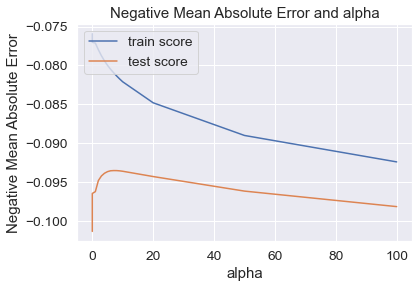

In [88]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
# plotting the mean train scores
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# plotting the mean test scores
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# setting the x label
plt.xlabel('alpha')
# setting the y label
plt.ylabel('Negative Mean Absolute Error')
# setting the title
plt.title("Negative Mean Absolute Error and alpha")
# setting the legend
plt.legend(['train score', 'test score'], loc='upper left')
# showing the plot
plt.show()

In [89]:
# finding the best Alpha value
print ('The best value of Alpha for Ridge Regression is: ',model_cv.best_params_)

The best value of Alpha for Ridge Regression is:  {'alpha': 7.0}


HyperParameter tuning

Since we now know that the best Alpha (Regularization term) value is 7, we will now build our model with the same

In [90]:
# setting the value of alpha as 7
alpha = 7
# initializing the ridge regression with the optimized alpha value
ridge = Ridge(alpha=alpha)

# running the ridge algo on the train datasets
ridge.fit(X_train, y_train)

# Lets predict
y_train_pred = ridge.predict(X_train)
print("RMSE Train {}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("R2 Score Train {}".format(r2_score(y_train, y_train_pred)))
y_test_pred = ridge.predict(X_test)
print("RMSE Test {}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print("R2 Score Test {}".format(r2_score(y_test, y_test_pred)))

RMSE Train 0.1098017016717233
R2 Score Train 0.9203763093854532
RMSE Test 0.13380921829142084
R2 Score Test 0.8875221581273847


As we can see from the above, the R2 score of Train set is 0.92 and test is 0.88 for Ridge Regression

In [91]:
# checking the coefficient values of all the features.
ridge.coef_

array([-3.06288821e-04,  5.22184486e-04,  8.99643649e-06,  7.18581544e-02,
        3.63446337e-02, -2.18016390e-03, -1.41138294e-03,  6.56538142e-05,
        4.69291807e-02,  4.43684305e-02,  1.05126916e-03,  2.08987111e-02,
        2.36968777e-04,  6.18334390e-03,  6.06631850e-02,  1.10785214e-04,
        1.97530569e-02, -2.80819623e-03, -2.87209548e-02,  1.73761159e-02,
        1.73819429e-02,  0.00000000e+00,  4.01891483e-02,  4.07781928e-02,
       -8.04470893e-03, -1.21323337e-02,  1.28517993e-03, -2.16268996e-03,
        4.93407292e-03,  1.01584406e-02, -4.06522382e-02,  1.06151852e-02,
        1.26939313e-02,  1.52475409e-02, -4.29365362e-02,  7.14900321e-03,
        2.89992706e-02, -7.44625070e-02, -2.01838383e-02, -3.01213812e-02,
        3.82196467e-02,  2.41470809e-02,  5.12194883e-02,  5.50171767e-03,
        6.07756187e-02, -5.43643453e-02,  4.37537916e-02,  0.00000000e+00,
       -2.11070922e-03, -1.89848878e-02, -2.87076725e-02, -3.28732634e-02,
       -1.69221142e-02,  

In [92]:
# Assigning the columns to the respective coefficient values
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', 10.644),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.072),
 ('OverallCond', 0.036),
 ('YearBuilt', -0.002),
 ('YearRemodAdd', -0.001),
 ('MasVnrArea', 0.0),
 ('TotRmsAbvGrd', 0.047),
 ('Fireplaces', 0.044),
 ('GarageYrBlt', 0.001),
 ('GarageCars', 0.021),
 ('GarageArea', 0.0),
 ('YrSold', 0.006),
 ('Total_Bathrooms_sq_feet', 0.061),
 ('Total_porch_sq_feet', 0.0),
 ('BldgType_2fmCon', 0.02),
 ('BldgType_Duplex', -0.003),
 ('BldgType_Twnhs', -0.029),
 ('BldgType_TwnhsE', 0.017),
 ('BsmtCond_Gd', 0.017),
 ('BsmtCond_Po', 0.0),
 ('BsmtCond_TA', 0.04),
 ('BsmtExposure_Gd', 0.041),
 ('BsmtExposure_Mn', -0.008),
 ('BsmtExposure_No', -0.012),
 ('BsmtFinType1_BLQ', 0.001),
 ('BsmtFinType1_GLQ', -0.002),
 ('BsmtFinType1_LwQ', 0.005),
 ('BsmtFinType1_Rec', 0.01),
 ('BsmtFinType1_Unf', -0.041),
 ('BsmtFinType2_BLQ', 0.011),
 ('BsmtFinType2_GLQ', 0.013),
 ('BsmtFinType2_LwQ', 0.015),
 ('BsmtFinType2_No', -0.043),
 ('BsmtFinType2_Rec', 0.007),


Let's Plot the above and find the top 10 features of Ridge regression

Text(0.5, 1.0, 'Model Coefficients')

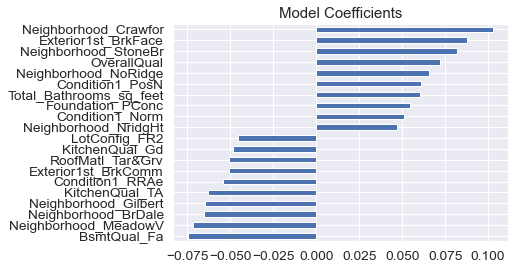

In [93]:
# pulling the coefficients and index and creating a new df
coef = pd.Series(ridge.coef_, index = X.columns).sort_values()
# filtering the top 5 positive and negative features 
ridge_imp_coef = pd.concat([coef.head(10), coef.tail(10)])
# plotting the graph
ridge_imp_coef.plot(kind = "barh")
# setting the title of the plot
plt.title("Model Coefficients")

In [94]:
# Converting the important feature list into a df for better understanding
ridge_imp_coef = ridge_imp_coef.to_frame('Coeff_val').reset_index()
ridge_imp_coef.columns = ['Features', 'Coeff_val']
ridge_imp_coef['Coeff_val'] = ridge_imp_coef['Coeff_val'].abs()
ridge_imp_coef = ridge_imp_coef.sort_values(by=['Coeff_val'], ascending=False)
ridge_imp_coef.head(10)

,Features,Coeff_val
19,Neighborhood_Crawfor,0.102768
18,Exterior1st_BrkFace,0.087601
17,Neighborhood_StoneBr,0.082100
0,BsmtQual_Fa,0.074463
1,Neighborhood_MeadowV,0.072078
16,OverallQual,0.071858
2,Neighborhood_BrDale,0.065518
15,Neighborhood_NoRidge,0.065410
3,Neighborhood_Gilbert,0.064581
4,KitchenQual_TA,0.062919


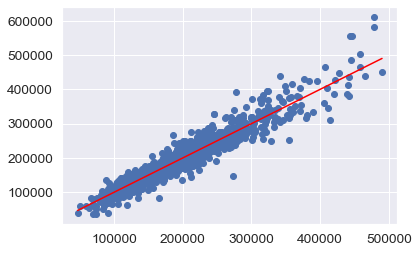

In [95]:
p_pred = np.expm1(ridge.predict(X))
plt.scatter(p_pred, np.expm1(y))
plt.plot([min(p_pred),max(p_pred)], [min(p_pred),max(p_pred)], c="red")

Inference:
As we can see that our predicted line is passing through almost the entire dataset

#### 6.2 Lasso Regression
Now lets run Lasso Regression on the dataset.

In [96]:
# initializing the Lasso regression
lasso = Lasso()

# cross validation
# performing GridSearchCV on the lasso regression using the list of params
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
# Fitting the model on our Train sets
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
# Storing the results in a new df
cv_results = pd.DataFrame(model_cv.cv_results_)

# checking the results
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.086071,1.002781e-01,0.004788,9.769237e-04,0.0001,{'alpha': 0.0001},-0.100098,-0.096356,-0.092500,-0.102996,-0.091800,-0.096750,0.004311,2,-0.075532,-0.077018,-0.078158,-0.076760,-0.078117,-0.077117,0.000973
1,0.015756,1.715036e-03,0.004389,1.018384e-03,0.001,{'alpha': 0.001},-0.094944,-0.095050,-0.087010,-0.099901,-0.096688,-0.094719,0.004250,1,-0.085786,-0.087594,-0.087853,-0.086359,-0.086751,-0.086869,0.000767
2,0.009574,7.986552e-04,0.004189,3.990655e-04,0.01,{'alpha': 0.01},-0.107833,-0.113743,-0.097755,-0.105896,-0.104713,-0.105988,0.005157,3,-0.103485,-0.101825,-0.104962,-0.103192,-0.104041,-0.103501,0.001033
3,0.007580,4.882475e-04,0.003988,6.309043e-04,0.05,{'alpha': 0.05},-0.128952,-0.123216,-0.115233,-0.113756,-0.118129,-0.119857,0.005578,4,-0.117859,-0.116752,-0.118529,-0.117585,-0.118124,-0.117770,0.000597
4,0.006982,8.662177e-07,0.003989,7.072638e-07,0.1,{'alpha': 0.1},-0.158762,-0.139823,-0.136081,-0.131105,-0.136340,-0.140422,0.009581,5,-0.140134,-0.136873,-0.137881,-0.136001,-0.139016,-0.137981,0.001474


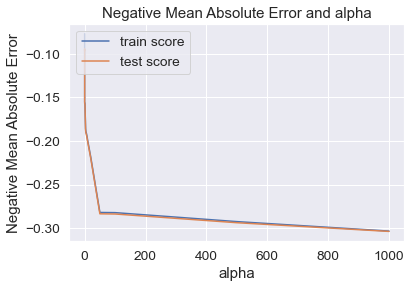

In [98]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
# plotting the mean train scores
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# plotting the mean test scores
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# setting the x label
plt.xlabel('alpha')
# setting the y label
plt.ylabel('Negative Mean Absolute Error')
# setting the title
plt.title("Negative Mean Absolute Error and alpha")
# setting the legend
plt.legend(['train score', 'test score'], loc='upper left')
# showing the plot
plt.show()

Since we are unable to read the above graph properly, we will convert the x-scale into log

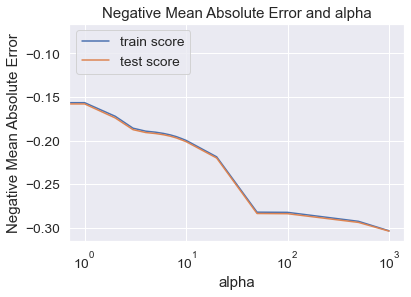

In [99]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
# plotting the mean train scores
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# plotting the mean test scores
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# setting the x label
plt.xlabel('alpha')
# setting the y label
plt.ylabel('Negative Mean Absolute Error')
# setting the xscale into log
plt.xscale('log')
# setting the title
plt.title("Negative Mean Absolute Error and alpha")
# setting the legend
plt.legend(['train score', 'test score'], loc='upper left')
# showing the plot
plt.show()

In [100]:
print('The best value of Alpha for Lasso Regression is: ',model_cv.best_params_)

The best value of Alpha for Lasso Regression is:  {'alpha': 0.001}


HyperParameter tuning
Now we will build our model with the optimized value of alpha for Lasso regression i.e 0.001

In [101]:
# initializing the ridge regression with the optimized alpha value
lm = Lasso(alpha=0.001)
# fitting the model on the train datasets
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("RMSE Train {}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("R2 Score Train {}".format(r2_score(y_train, y_train_pred)))
y_test_pred = lm.predict(X_test)
print("RMSE Test {}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print("R2 Score Test {}".format(r2_score(y_test, y_test_pred)))

RMSE Train 0.11821184037785908
R2 Score Train 0.9077118119081944
RMSE Test 0.1365401297142345
R2 Score Test 0.8828841890549196


As we can see from the above, the R2 score of Train set is 0.90 and test is 0.88 for Lasso Regression

In [102]:
# checking the coefficient values of all the features.
lm.coef_

array([-3.11296081e-04,  6.87751560e-04,  9.16361967e-06,  8.14330601e-02,
        3.76964890e-02, -2.37248821e-03, -1.38457622e-03,  8.41668625e-05,
        4.83093357e-02,  4.48730832e-02,  9.70195680e-04,  1.40980048e-02,
        2.72066395e-04,  5.40570796e-03,  6.10302209e-02,  1.25792956e-04,
        0.00000000e+00, -0.00000000e+00, -1.29586101e-02,  1.59486802e-02,
        0.00000000e+00,  0.00000000e+00,  3.23351772e-02,  3.21188918e-02,
        0.00000000e+00, -2.67758686e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.00387270e-03, -3.69854585e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.74277657e-02, -0.00000000e+00,
        1.74031954e-02, -2.69695851e-02, -0.00000000e+00,  0.00000000e+00,
        2.06471803e-02,  0.00000000e+00,  2.39293747e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [103]:
# Assigning the columns to the respective coefficient values
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.575),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.081),
 ('OverallCond', 0.038),
 ('YearBuilt', -0.002),
 ('YearRemodAdd', -0.001),
 ('MasVnrArea', 0.0),
 ('TotRmsAbvGrd', 0.048),
 ('Fireplaces', 0.045),
 ('GarageYrBlt', 0.001),
 ('GarageCars', 0.014),
 ('GarageArea', 0.0),
 ('YrSold', 0.005),
 ('Total_Bathrooms_sq_feet', 0.061),
 ('Total_porch_sq_feet', 0.0),
 ('BldgType_2fmCon', 0.0),
 ('BldgType_Duplex', -0.0),
 ('BldgType_Twnhs', -0.013),
 ('BldgType_TwnhsE', 0.016),
 ('BsmtCond_Gd', 0.0),
 ('BsmtCond_Po', 0.0),
 ('BsmtCond_TA', 0.032),
 ('BsmtExposure_Gd', 0.032),
 ('BsmtExposure_Mn', 0.0),
 ('BsmtExposure_No', -0.003),
 ('BsmtFinType1_BLQ', 0.0),
 ('BsmtFinType1_GLQ', 0.0),
 ('BsmtFinType1_LwQ', 0.0),
 ('BsmtFinType1_Rec', 0.005),
 ('BsmtFinType1_Unf', -0.037),
 ('BsmtFinType2_BLQ', 0.0),
 ('BsmtFinType2_GLQ', 0.0),
 ('BsmtFinType2_LwQ', 0.0),
 ('BsmtFinType2_No', -0.017),
 ('BsmtFinType2_Rec', -0.0),
 ('BsmtFinType2_Unf'

Text(0.5, 1.0, 'Model Coefficients')

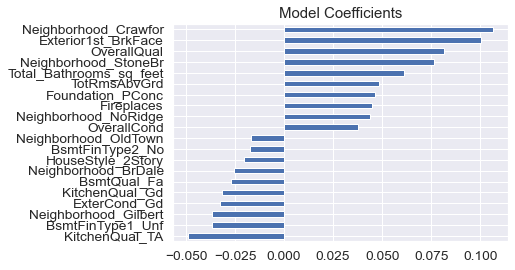

In [104]:
# pulling the coefficients and index and creating a new df
coef = pd.Series(lm.coef_, index = X.columns).sort_values()
# filtering the top 5 positive and negative features 
lasso_imp_coef = pd.concat([coef.head(10), coef.tail(10)])
# plotting the graph
lasso_imp_coef.plot(kind = "barh")
# setting the title of the plot
plt.title("Model Coefficients")

In [105]:
# Converting the important feature list into a df for better understanding
lasso_imp_coef = lasso_imp_coef.to_frame('Coeff_val').reset_index()
lasso_imp_coef.columns = ['Features', 'Coeff_val']
lasso_imp_coef['Coeff_val'] = lasso_imp_coef['Coeff_val'].abs()
lasso_imp_coef = lasso_imp_coef.sort_values(by=['Coeff_val'], ascending=False)
lasso_imp_coef.head(10)

,Features,Coeff_val
19,Neighborhood_Crawfor,0.106457
18,Exterior1st_BrkFace,0.100662
17,OverallQual,0.081433
16,Neighborhood_StoneBr,0.076448
15,Total_Bathrooms_sq_feet,0.061030
0,KitchenQual_TA,0.048759
14,TotRmsAbvGrd,0.048309
13,Foundation_PConc,0.046440
12,Fireplaces,0.044873
11,Neighborhood_NoRidge,0.043763


Lets visualize the fit after the modelling

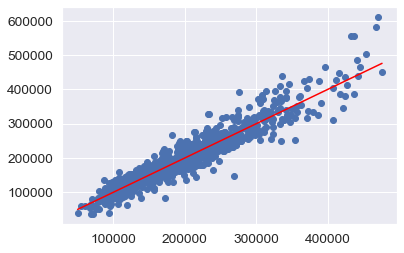

In [106]:
p_pred = np.expm1(lm.predict(X))
plt.scatter(p_pred, np.expm1(y))
plt.plot([min(p_pred),max(p_pred)], [min(p_pred),max(p_pred)], c="red")

In [107]:
# checking how many features were dropped by lasso during modelling
print("Lasso kept",sum(coef != 0), "important features and dropped the other", sum(coef == 0),"features")

Lasso kept 57 important features and dropped the other 95 features


## Final Conclusion:

Based on our regression results, below are the top 10 features which drive the Sales prices of the Houses in Australia.

### Ridge Regression:

We can see that the Train and Test R2 value was 0.92 and 0.88 respectively.

The top 10 features that drive the house prices as per Ridge regression are :

Neighborhood_Crawfor

Exterior1st_BrkFace

Neighborhood_StoneBr

BsmtQual_Fa

Neighborhood_MeadowV

OverallQual

Neighborhood_BrDale

Neighborhood_NoRidge

Neighborhood_Gilbert

KitchenQual_TA

### Lasso Regression:
We can see that the Train and Test R2 value was 0.90 and 0.88 respectively.

The top 10 features that drive the house prices as per Lasso regression are:

Neighborhood_Crawfor

Exterior1st_BrkFace

OverallQual

Neighborhood_StoneBr

Total_Bathrooms_sq_feet

KitchenQual_TA

TotRmsAbvGrd

Foundation_PConc

Fireplaces

Neighborhood_NoRidge